/var/folders/m8/v1brzj4s56g48wwmpht61td40000gq/T/ipykernel_63386/2122401927.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


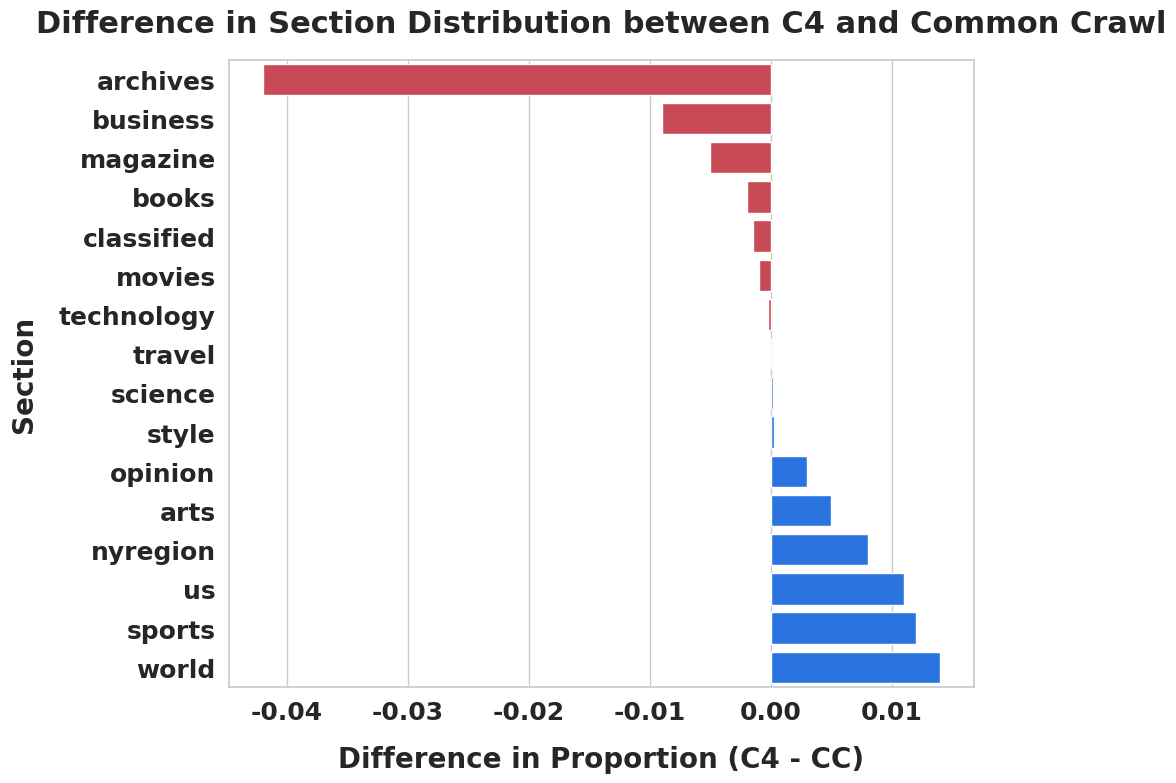

Figure saved as section_distribution_diff.pdf, .svg, and .png


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 1. Data Preparation
data = [
    {'section': 'archives', 'value': -0.042},
    {'section': 'arts', 'value': 0.005},
    {'section': 'books', 'value': -0.002},
    {'section': 'business', 'value': -0.009},
    {'section': 'classified', 'value': -0.0015},
    {'section': 'magazine', 'value': -0.005},
    {'section': 'movies', 'value': -0.001},
    {'section': 'nyregion', 'value': 0.008},
    {'section': 'opinion', 'value': 0.003},
    {'section': 'science', 'value': 0.0002},
    {'section': 'sports', 'value': 0.012},
    {'section': 'style', 'value': 0.0003},
    {'section': 'technology', 'value': -0.0002},
    {'section': 'travel', 'value': -0.00001},
    {'section': 'us', 'value': 0.011},
    {'section': 'world', 'value': 0.014},
]

df = pd.DataFrame(data)

# Sort the data by value (ascending: most negative to most positive)
df_sorted = df.sort_values('value', ascending=True).reset_index()

# 2. Setup Plot Styling (Mimicking the React version's aesthetics)
sns.set_theme(style="whitegrid") # Use whitegrid style as a base

# Define font properties matching the React example (adjust font name if needed)
# Common sans-serif fonts: 'Arial', 'Helvetica', 'DejaVu Sans', 'Verdana'
# Ensure the chosen font is available on your system. 'DejaVu Sans' is often a good default.
font_family = 'sans-serif'
title_fontsize = 22      # Adjust as needed for publication
axis_label_fontsize = 20 # Adjust as needed
tick_label_fontsize = 18 # Adjust as needed

plt.rcParams.update({
    'font.family': font_family,
    'font.sans-serif': ['DejaVu Sans'], # Fallback font
    'font.weight': 'normal',
    'axes.labelweight': 'bold', # Bold axis labels
    'axes.titleweight': 'bold', # Bold title
    'axes.titlesize': title_fontsize,
    'axes.labelsize': axis_label_fontsize,
    'xtick.labelsize': tick_label_fontsize,
    'ytick.labelsize': tick_label_fontsize,
})


# 3. Create the color palette based on value sign
# Using similar colors to the React example's hex codes
colors = ['#dc3545' if v < 0 else '#0d6efd' for v in df_sorted['value']]

# 4. Create the Plot
# Increase figure height to accommodate labels (adjust width/height as needed)
fig, ax = plt.subplots(figsize=(10, 8)) # width, height in inches

# Create the horizontal bar plot
sns.barplot(
    x='value',
    y='section',
    data=df_sorted,
    palette=colors, # Apply the custom conditional colors
    ax=ax,
    orient='h' # Explicitly horizontal
)

# 5. Customize the Plot
# --- Title ---
ax.set_title('Difference in Section Distribution between C4 and Common Crawl',
             pad=20) # Add padding above title

# --- Axis Labels ---
ax.set_xlabel('Difference in Proportion (C4 - CC)', labelpad=15) # Add padding below label
ax.set_ylabel('Section', labelpad=15) # Add padding left of label

# --- Tick Labels ---
# Make tick labels bold (more explicit control than relying purely on rcParams)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# --- Grid ---
# Customize grid appearance (show only vertical grid lines)
# ax.xaxis.grid(True, linestyle='--', linewidth=0.7, color='grey', alpha=0.7)
# ax.yaxis.grid(False) # Turn off horizontal grid lines

# --- Spines (optional: remove top and right border) ---
# sns.despine(left=True, bottom=True) # Remove top and right spines, keep bottom/left

# --- X-axis Ticks Formatting (optional: format numbers if needed) ---
# Example: Format as percentage if desired
# formatter = mticker.PercentFormatter(xmax=1.0, decimals=1)
# ax.xaxis.set_major_formatter(formatter)
# Example: Format with fixed decimals (as in tooltip)
formatter = mticker.FormatStrFormatter('%.2f')
ax.xaxis.set_major_formatter(formatter)


# 6. Final Adjustments and Saving
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Save the figure (choose your desired format and DPI)
# For vector format (scales perfectly):
plt.savefig('../data/section_distribution_diff.pdf', bbox_inches='tight')
plt.savefig('../data/section_distribution_diff.svg', bbox_inches='tight')

# For high-resolution raster format:
plt.savefig('../data/section_distribution_diff.png', dpi=300, bbox_inches='tight')

# Display the plot (optional, if running interactively)
plt.show()

print("Figure saved as section_distribution_diff.pdf, .svg, and .png")